**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [2]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.4.1'

In [3]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [4]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


In [5]:
#Seleccionamos las siguientes columnas del df de Airbnb. Las mismas nos parecen relevantes y que pueden aportar informacion complementaria al df original. 
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [6]:
airbnb_df[:3]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


### Eliminación outliers
Se analiza a continuación la distribución de los precios de las propiedades utilizando la columna 'Price'. 

#### **Cálculo de media, mediana y moda del PRICE**

In [7]:
#Analizaremos el comportamiento del precio de las propiedades con la intencion de eliminar valores extremos.  

data = melb_df['Price']
print('Media', data.mean())
print('Mediana',data.median())
print('Desviación Estándar',data.std())

Media 1075684.079455081
Mediana 903000.0
Desviación Estándar 639310.7242960194


#### Distribución del PRICE actual

Text(0.5, 0, 'Price (USD)')

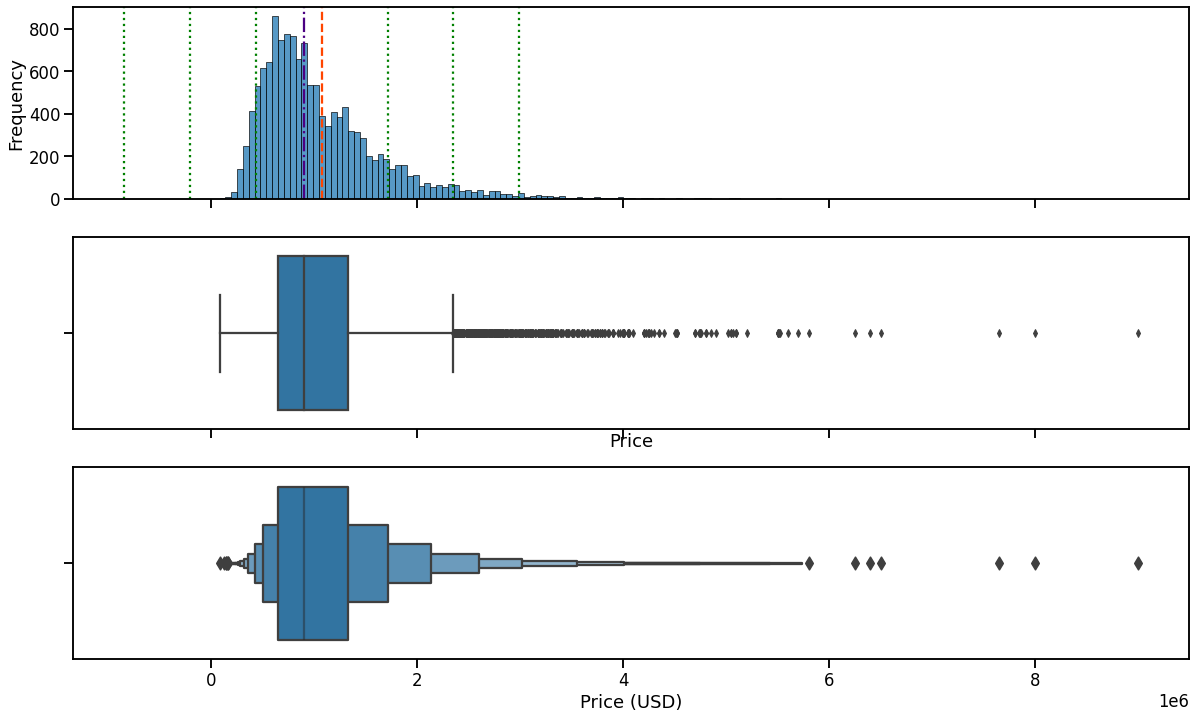

In [8]:
#Graficamos los datos de la columna "Price" y las correspondientes variables estadísticas, tal colo la media, la mediana y la desviacion estandar. 
fig, axes = plt.subplots(figsize=(20, 12), nrows=3,sharex=True)

seaborn.histplot(x=data, ax=axes[0])

axes[0].axvline(data.mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(data.median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].axvline(data.mean()+ data.std(), color='green',
            linestyle='dotted', label='1 Std')
axes[0].axvline(data.mean()- data.std(), color='green',
            linestyle='dotted', label='-1 Std')
axes[0].axvline(data.mean()+ 2 * data.std(), color='green',
            linestyle='dotted', label='2 Std')
axes[0].axvline(data.mean()- 2 * data.std(), color='green',
            linestyle='dotted', label='-2 Std')
axes[0].axvline(data.mean()+ 3 * data.std(), color='green',
            linestyle='dotted', label='2 Std')
axes[0].axvline(data.mean()- 3 * data.std(), color='green',
            linestyle='dotted', label='-2 Std')

axes[0].set_ylabel('Frequency')


seaborn.boxplot(x=data, ax=axes[1])

seaborn.boxenplot(x=data, ax=axes[2])

plt.xlabel('Price (USD)')

#### Cálculo de percentiles mínimos

In [9]:
##Se observan muchos valores outliers. Trataremos de acotar los valores analizando los percentiles.

In [10]:
#Calculamos varios percentiles inferiores
melb_df['Price'].quantile([.005, .01, .04, .05])

0.005    270000.0
0.010    300000.0
0.040    385000.0
0.050    405000.0
Name: Price, dtype: float64

In [11]:
#Veamos que % de los datos quedarían afuera si optamos como cota inferior el percentil 1%. 
j = 1
percentile_1 = melb_df['Price'].quantile(j / 100)
n_below = len(melb_df[melb_df['Price'] < percentile_1])
n_above = len(melb_df[melb_df['Price'] > percentile_1])
print('Percentil {} de la columna {}: {}'.format(j, 'Price', percentile_1))
print('% de datos menor que percentil {}: {}'.format(j, n_below / len(melb_df)*100))
print('% de datos mayor que percentil {}: {}'.format(j, n_above / len(melb_df)*100))

Percentil 1 de la columna Price: 300000.0
% de datos menor que percentil 1: 0.9867452135493372
% de datos mayor que percentil 1: 98.8880706921944


In [12]:
## Consideramos que 300.000 USD es un valor razonable y "redondo" para definir como cota inferior el percentil 1 de nuestros datos de la columna "Price". 

## Ahora hacemos lo mismo con los percentiles superiores:

#### Calculamos los percentiles superiores.

In [13]:
melb_df['Price'].quantile([.95, .96, .97, .98, .99, .995])

0.950    2290050.0
0.960    2410000.0
0.970    2600000.0
0.980    2865360.0
0.990    3338150.0
0.995    3900000.0
Name: Price, dtype: float64

Analicemos como limite superior el percentil  99. 

In [14]:
k = 99
percentile_99 = melb_df['Price'].quantile(k / 100)
n_below = len(melb_df[melb_df['Price'] < percentile_99])
n_above = len(melb_df[melb_df['Price'] > percentile_99])
print('Percentil {} de la columna {}: {}'.format(k, 'Price', percentile_99))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(melb_df)*100))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(melb_df)*100))

Percentil 99 de la columna Price: 3338149.999999987
% de datos menor que percentil 99: 98.99852724594993
% de datos mayor que percentil 99: 1.0014727540500736


In [15]:
## Vemos que el percentil 99% como cota superior resulta bastante razonable. Pues más allá de los 3.000.000 USD, ya son pocos los datos y muy variables. 

In [16]:
##Definimos un nuevo df con la columna "Price" acotada de acuerdo al analisis previo. 
df_rango= melb_df[(melb_df['Price'] < percentile_99) & (melb_df['Price'] >= percentile_1)]

print('Número de filas POST 4º filtro:',len(df_rango.index))

Número de filas POST 4º filtro: 13310


In [17]:
df_rango

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


#### Distribución del PRICE con percentiles

In [18]:
# Como queda el gráfico anterior con la nueva columna "Price"?

data_rango = df_rango['Price']
print('Media', data_rango.mean())
print('Mediana',data_rango.median())
print('Desviación Estándar',data_rango.std())

Media 1052133.5010518406
Mediana 903000.0
Desviación Estándar 549659.0837502596


Text(0.5, 0, 'Price (USD)')

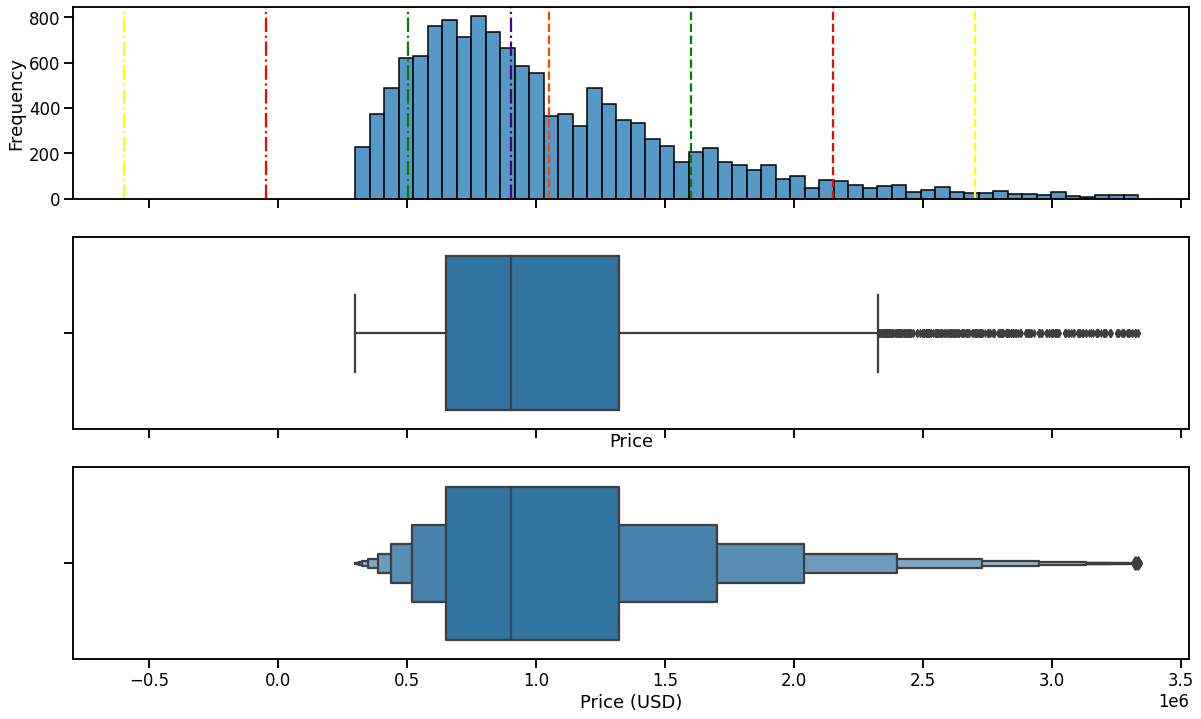

In [19]:
fig, axes = plt.subplots(figsize=(20, 12), nrows=3,sharex=True)
seaborn.histplot(x=data_rango, ax=axes[0])
axes[0].axvline(data_rango.mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(data_rango.median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].axvline(data_rango.mean()+ data_rango.std(), color='green',
            linestyle='--', label='1 Std')
axes[0].axvline(data_rango.mean()- data_rango.std(), color='green',
            linestyle='-.', label='-1 Std')
axes[0].axvline(data_rango.mean()+ 2 * data_rango.std(), color='red',
            linestyle='--', label='2 Std')
axes[0].axvline(data_rango.mean()- 2 * data_rango.std(), color='red',
            linestyle='-.', label='-2 Std')
axes[0].axvline(data_rango.mean()+ 3 * data_rango.std(), color='yellow',
            linestyle='--', label='2 Std')
axes[0].axvline(data_rango.mean()- 3 * data_rango.std(), color='yellow',
            linestyle='-.', label='-2 Std')
axes[0].set_ylabel('Frequency')

seaborn.boxplot(x=data_rango, ax=axes[1])

seaborn.boxenplot(x=data_rango, ax=axes[2])


plt.xlabel('Price (USD)')

In [20]:
## Podemos observar en esta nueva imagen mas detalladamente la distribucion de Precios y como se ha reducido el numero de outliers. 

In [21]:
#Finalmente, nos quedamos con el nuevo df. 
melb_df_ok = melb_df[(melb_df.Price >= melb_df.Price.quantile(.01)) & (melb_df.Price <= melb_df.Price.quantile(.99))]

#Nos queda un df con 13310 filas y 21 columnas. 

In [22]:
melb_df_ok

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


### Eliminación datos erroneos

In [23]:
## Buscamos columnas con valores NaN o inconsistencias en los datos. 

#### Exploración del data set melb_df_ok

> Bloque con sangría



In [24]:
melb_df_ok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13310 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13310 non-null  object 
 1   Address        13310 non-null  object 
 2   Rooms          13310 non-null  int64  
 3   Type           13310 non-null  object 
 4   Price          13310 non-null  float64
 5   Method         13310 non-null  object 
 6   SellerG        13310 non-null  object 
 7   Date           13310 non-null  object 
 8   Distance       13310 non-null  float64
 9   Postcode       13310 non-null  float64
 10  Bedroom2       13310 non-null  float64
 11  Bathroom       13310 non-null  float64
 12  Car            13248 non-null  float64
 13  Landsize       13310 non-null  float64
 14  BuildingArea   6968 non-null   float64
 15  YearBuilt      8019 non-null   float64
 16  CouncilArea    11957 non-null  object 
 17  Lattitude      13310 non-null  float64
 18  Longti

#### Describe del dataset

In [25]:
melb_df_ok.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13310.000000,1.331000e+04,13310.000000,13310.000000,13310.000000,13310.000000,13248.000000,13310.000000,6968.000000,8019.000000,13310.000000,13310.000000,13310.000000
mean,2.942074,1.052134e+06,10.176927,3105.203681,2.918933,1.525995,1.607261,558.751690,150.985933,1964.789999,-37.808914,144.995373,7455.341548
std,0.935935,5.496591e+05,5.882653,91.090663,0.948265,0.674365,0.955079,4030.138438,546.730044,37.276227,0.079586,0.104206,4385.700904
min,1.000000,3.000000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.485710,249.000000
25%,2.000000,6.500000e+05,6.200000,3044.000000,2.000000,1.000000,1.000000,179.000000,94.000000,1940.000000,-37.856720,144.929320,4380.000000
50%,3.000000,9.030000e+05,9.300000,3084.000000,3.000000,1.000000,2.000000,439.000000,126.000000,1970.000000,-37.801850,145.000100,6543.000000
75%,3.000000,1.320000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,172.000000,1999.000000,-37.755600,145.058800,10331.000000
max,10.000000,3.335000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


#### Análisis de valores extremos en las columnas numericas:
##### Vemos que:
* Distance: Tiene valores en 0 que se deberían analizar
* Bedroom2: Tiene valores en 0 que se deberían analizar
* Bathroom: Tiene valores en 0 que no deberían existir
* Landsize: Tiene valores en 0 que se deberían analizar
* BuildingArea: Tiene valores en 0 que se deberían analizar

##### En las variables categoricas vemos que:


* Suburb tiene una gran cantidad de valores que se deberían unificar
* Type tiene valores que se deberían analizar
* Councilarea tiene valores que se deberían analizar
* Regionname tiene valores que se podrían unificar

##### Detección de variables con 0

In [26]:
cols = melb_df_ok[melb_df_ok == 0].count(axis=0)
cols[cols > 0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1010
Landsize        1852
BuildingArea      16
dtype: int64

##### Chequear/Corregir columna **Distance**


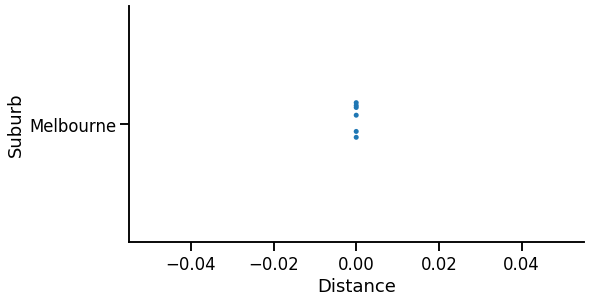

In [27]:
# Analizando, podemos ver que las filas con "Distance" (al centro) igual a 0 se encuentran todas en el mismo Suburb, por ende puede suceder que sean 
# propiedades que se encuentran en la zona centrica.  
seaborn.catplot(data=melb_df_ok[melb_df_ok.Distance==0], y='Suburb',
                x='Distance', height=4, aspect=2)

In [28]:
## Luego, la columna "Dsitance" está OK. 

##### Chequear/Corregir columna **Type**

In [29]:
# "Type" es una variable categorica que indica si la propiedad es House (h), Unit (u) o Townhouse (t). Por lo tanto, no puede haber valores nulos.
ocurrencia_minima = 20
melb_type = melb_df_ok.groupby('Type').size()
melb_type = melb_type[melb_type < ocurrencia_minima].sort_values()

# Reemplazamos entonces el nulo por "Other"

type_to_replace = melb_type.index.tolist()
if len(type_to_replace) > 0:
    melb_df_ok['Type'] = numpy.where(melb_df_ok['Type'].isin(type_to_replace), 'Other', melb_df_ok['Type'])

print(melb_type)

Series([], dtype: int64)


In [30]:
melb_df_ok.Type.unique()

#Luego, columna "Type" OK.

array(['h', 'u', 't'], dtype=object)

##### Chequear/Corregir columna **Bathroom**
No existe la posibilidad de que las propiedades NO tengan Bathroom (= 0) por tal motivo se igualan a 1 estos valores ya que cada propiedad debe poseer al menos 1 baño. 

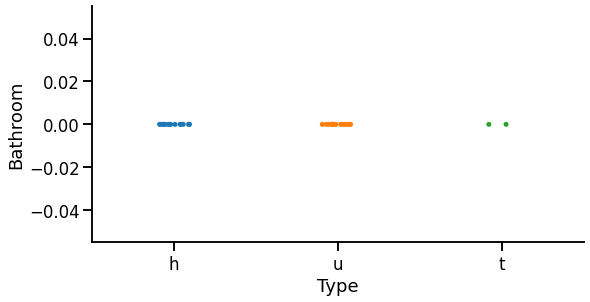

In [31]:
seaborn.catplot(data=melb_df_ok[melb_df_ok.Bathroom==0], y='Bathroom',
                x='Type', height=4, aspect=2)

In [32]:
melb_bathroom = melb_df
melb_bathroom.loc[melb_bathroom.Bathroom<1,'Bathroom']=1
melb_bathroom.describe()

# Queda así la columna "Bathroom" OK.

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.536745,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.687953,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


##### Chequear/Corregir columna **Landsize**
Landsize puede ser igual a 0 en departamentos por tal motivo se mantienen estos valores. 

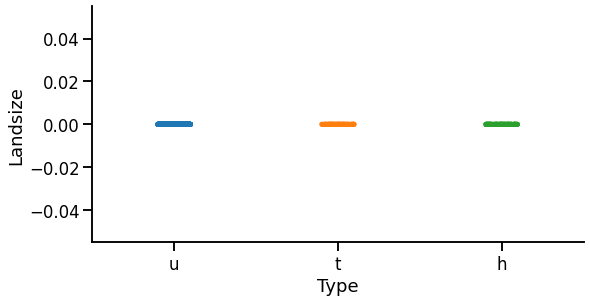

In [33]:
seaborn.catplot(data=melb_df_ok[melb_df_ok.Landsize==0], y='Landsize',
                x='Type', height=4, aspect=2)

##### Chequear/Corregir columna **Buildingarea**
Building area se refiere a los m2 de una vivienda. No puede ser igual, pero puede haberse confundido esta variable con "Landsize". Por el momento, la mantendremos así. 

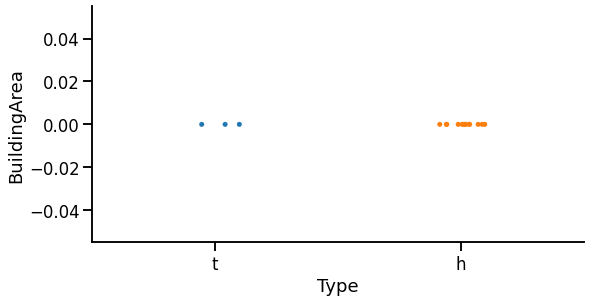

In [34]:
seaborn.catplot(data=melb_df_ok[melb_df_ok.BuildingArea==0], y='BuildingArea',
                x='Type', height=4, aspect=2)

##### Chequear/Corregir columna **Suburb**

In [35]:
# Dado que los valores de suburbios en la columna Subur son 313:

len(melb_df_ok.Suburb.unique())

#Agruparemos los suburbios con menos de 100 apariciones en "Other". 
# Nos quedan así, 43 posibles valores en la columna Suburb, una cantidad más razonable. 

313

In [36]:
ocurrencia_minima = 100
# Buscar Suburbios con menos de n apariciones
melb_suburb = melb_df_ok.groupby('Suburb').size()
print(melb_suburb)
melb_suburb = melb_suburb[melb_suburb < ocurrencia_minima].sort_values()
print(melb_suburb)
# Reemplazar el valor por Others
suburb_to_replace = melb_suburb.index.tolist()
if len(suburb_to_replace) > 0:
    melb_df_ok['Suburb'] = numpy.where(melb_df_ok['Suburb'].isin(suburb_to_replace), 'Other', melb_df_ok['Suburb'])

print(melb_df_ok)

Suburb
Abbotsford       56
Aberfeldie       42
Airport West     67
Albanvale         6
Albert Park      66
               ... 
Wonga Park        1
Wyndham Vale      4
Yallambie        24
Yarra Glen        1
Yarraville      164
Length: 313, dtype: int64
Suburb
Yarra Glen         1
Croydon South      1
Emerald            1
Healesville        1
Monbulk            1
                  ..
Maidstone         92
Fitzroy North     92
Maribyrnong       95
Ivanhoe           98
West Footscray    99
Length: 271, dtype: int64
             Suburb  ... Propertycount
0             Other  ...        4019.0
1             Other  ...        4019.0
2             Other  ...        4019.0
3             Other  ...        4019.0
4             Other  ...        4019.0
...             ...  ...           ...
13575         Other  ...        7392.0
13576  Williamstown  ...        6380.0
13577  Williamstown  ...        6380.0
13578  Williamstown  ...        6380.0
13579    Yarraville  ...        6543.0

[13310 rows x 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Chequear/Corregir columna **CouncilArea**

In [37]:
# Dado que los valores de CouncilArea en la columna Subur son 33:

len(melb_df_ok.CouncilArea.unique())

#Agruparemos los suburbios con menos de 100 apariciones en "Other". 

# Nos quedan así, 22 posibles valores en la columna Suburb. 

33

In [38]:
ocurrencia_minima = 100
# Buscar Council Areas con menos de 50 apariciones
melb_council_area = melb_df_ok.groupby('CouncilArea').size()
melb_council_area = melb_council_area[melb_council_area < ocurrencia_minima].sort_values()

# Reemplazar el valor por Others
council_area_to_replace = melb_council_area.index.tolist()
if len(council_area_to_replace) > 0:
    melb_df_ok['CouncilArea'] = numpy.where(melb_df_ok['CouncilArea'].isin(council_area_to_replace), 'Other', melb_df_ok['CouncilArea'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Chequear/Corregir columna **Regionname**

In [39]:
## Analizamos lo mismo con la variable Regionname.

len(melb_df_ok.Regionname.unique())

#Vemos que solo tiene 8 valores posibles, así que la dejamos así. 

8

##### Chequear/Corregir columna **Bedroom2**

In [40]:
#Analicemos la columna Bedroom2 (scraping data)

###### Errores en casas con más dormitorios que ambientes

In [41]:
# Vemos que algunas propiedades tienen mas "Bedrooms" que "Rooms".
melb_df_err = melb_df[melb_df.Rooms < melb_df.Bedroom2]
pandas.crosstab(melb_df_err.Rooms, melb_df_err.Bedroom2)

Bedroom2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,20.0
Rooms,,,,,,,,,
1,16,2,0,0,0,0,0,0,0
2,0,74,8,1,0,0,0,0,0
3,0,0,73,5,0,0,0,1,1
4,0,0,0,15,0,0,0,1,0
5,0,0,0,0,2,1,1,0,0
6,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,1,0


###### Mapa de calor entre Rooms y Bedroom2

In [42]:
#En el siguiente mapa de calor podemos observar como los valores de Rooms y Bedroom2 tienen alta correlacion (color claro cercano a 1), mientras que
# comparando con la columna "Bathroom" podemos ver baja correlacion. 

relevant_cols = melb_df[['Rooms', 'Bedroom2', 'Bathroom']]



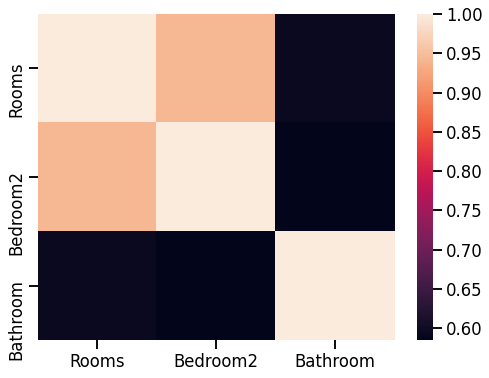

In [43]:
fig = plt.figure(figsize=(8,6))
seaborn.heatmap(relevant_cols.corr())

In [44]:
# Observemos cuantas veces la columna Rooms reproduce el valor de la columna Bedroom2

equals = len(relevant_cols[relevant_cols['Rooms'] == relevant_cols['Bedroom2']])
print('Cantidad de datos donde la cantidad de Rooms es igual a la cantidad de Bedroom2:', equals)

Cantidad de datos donde la cantidad de Rooms es igual a la cantidad de Bedroom2: 12904


In [45]:
#De 13310 propiedades, 12904 tienen los mismos valores en ambas columnas. 

#Luego, decidimos que la columna bedroom2 no es relevante para el analisis y la descartamos.  

### Selección de variables para análisis

In [46]:
## Finalmente, seleccionaremos las columnas que consideramos mas relevantes para resolver nuestro problema. 

In [47]:
melb_df_ok[:1]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Other,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0


#### Columnas relevantes para el problema hasta ahora. 
* Regionname: General Region (West, North West, North, North east …etc) 
* Price: Price in dollars
* Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
* Distance: Distance from CBD
* Bathroom: Number of Bathrooms
* Car: Number of carspots
* BuildingArea: Building Size (Superficie cubierta)
* Lattitude                
* Longitude
* Suburb: region 
* Rooms: Number of rooms
* YearBuilt
* Postcode
* CouncilArea: Governing council for the area --> No se considera un dato relevante para el valor de la propiedad, se asume que no existen políticas especiales
#### Columnas no utilizadas. Algunas veremos a continuacion xq no serán utilizadas.  

* SellerG: Real Estate Agent --> No nos interesa el Agente
* Address: property address --> Porque hay mucha variabilidad ya que existe un único valor para cada columna por tal motivo se elimina del análisis
* Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available. --> No se visualiza relación entre el precio y el method por tal motivo no se utiliza como relevante esta columna
* Date: Date sold. No consideramos x el momento relevante la fecha de venta. 
* Bedroom2 : Scraped # of Bedrooms (from different source)
* Landsize: Land Size --> No se observa dependencia entre el tamaño del terreno y el valor de la tierra (Superficie total)
* Propertycount: Number of properties that exist in the suburb. --> Es importante conocer si el barrio/suburb se encuentra poblado. Eso podría ser indicador de diversidad de comercios en la zona, seguridad, transporte publico, etc. Sin embargo, vemos que esta variable puede "englobarse" en regionname. 



##### Variables Method y Price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



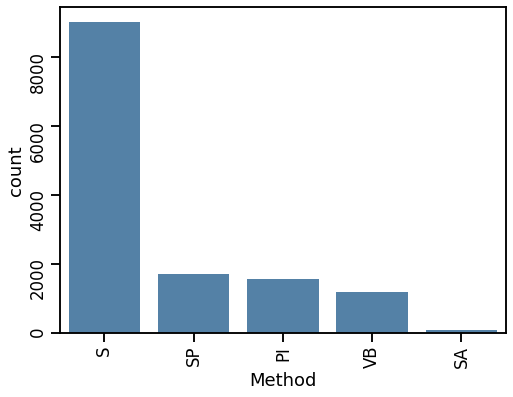

In [48]:
# Hay relacion entre el precio y el metodo de venta?

fig = plt.figure(figsize=(8,6))
chart = seaborn.countplot(melb_df.Method, color='steelblue')
chart.tick_params(labelrotation=90)

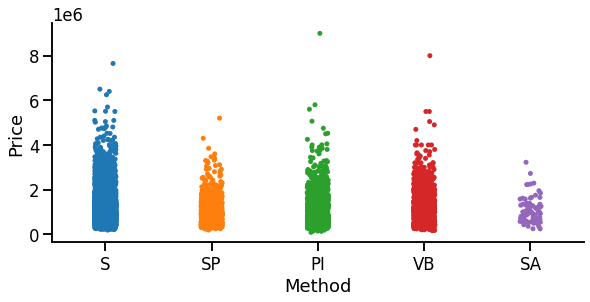

In [49]:
seaborn.catplot(data=melb_df, y='Price',
                x='Method', height=4, aspect=2)

El gráfico anterior parece indicar que no existe relación entre el precio y el method por tal motivo no se considera la variable Method como relevante y se ha descartado esa columna. 


##### Variable Date y Price


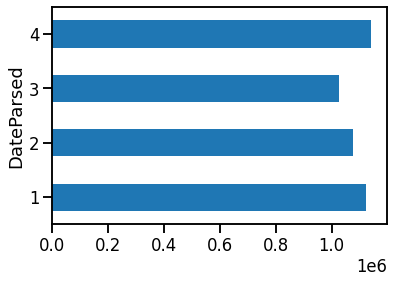

In [50]:
# Hay relacion entre el precio y la fecha de venta?

melb_df['DateParsed'] = pandas.to_datetime(melb_df['Date'])
groupByQuarter = melb_df.groupby(melb_df['DateParsed'].dt.quarter).mean()['Price']
groupByQuarter.plot(kind='barh')

Analizando los valores de venta por trimestre, vemos que en principio no hay evidencia de correlacion entre dichas variables, x lo que eliminamos la columna Date. 

##### Variable Distance y Price

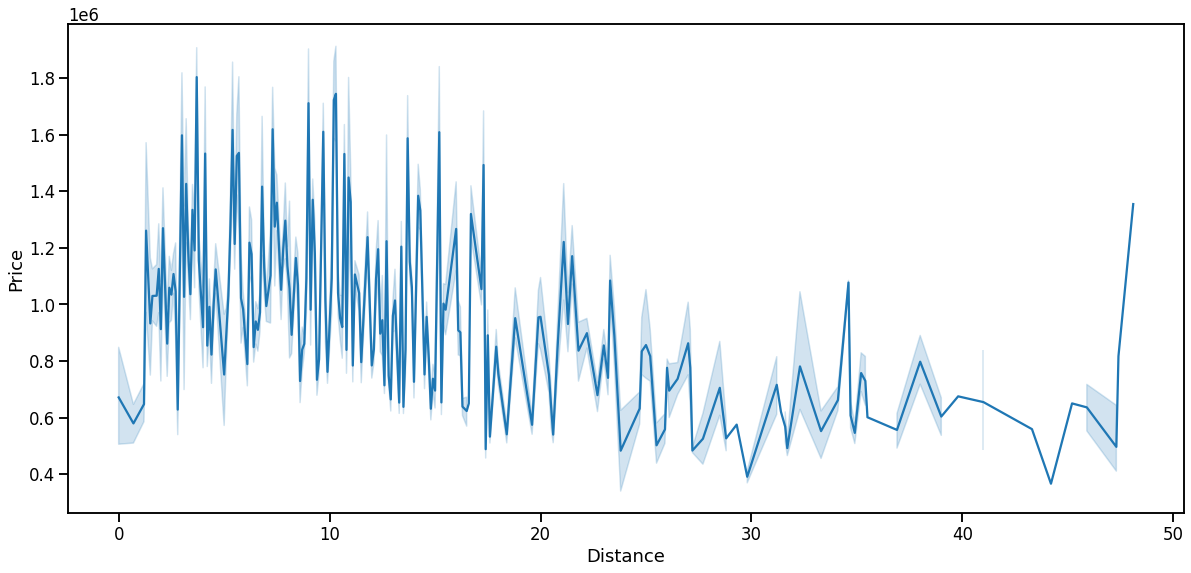

In [51]:
# Hay correlacion entre el precio de una propiedad y su distancia al centro?

plt.figure(figsize=(20,9))
seaborn.lineplot(y=melb_df_ok.Price,x=melb_df_ok.Distance)

Claramente sí! Vemos como la distancia al centro influye significativamente en el precio y por tal motivo GUARDAMOS la columna para análisis. 

##### Variable Regionname y Price

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

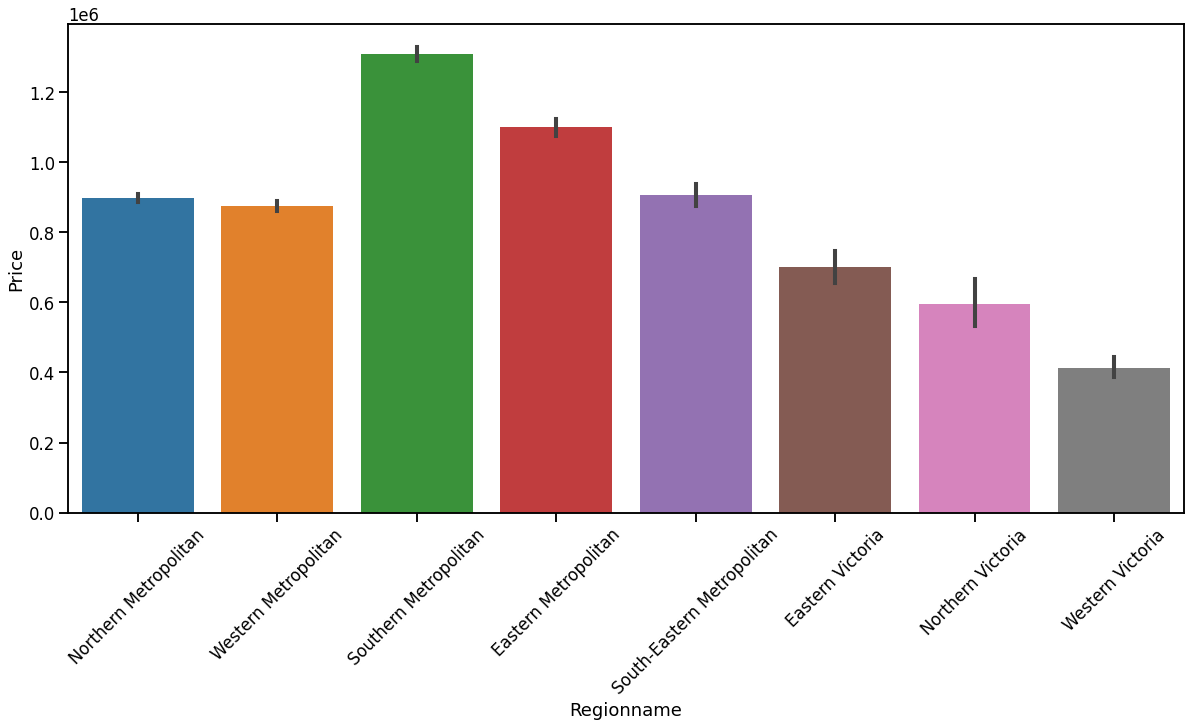

In [52]:
## Hay correlacion entre dichas variables?

plt.figure(figsize=(20,9))
seaborn.barplot(y=melb_df_ok.Price,x=melb_df_ok.Regionname) #,ci=None,hue=melb_df_ok.Rooms)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

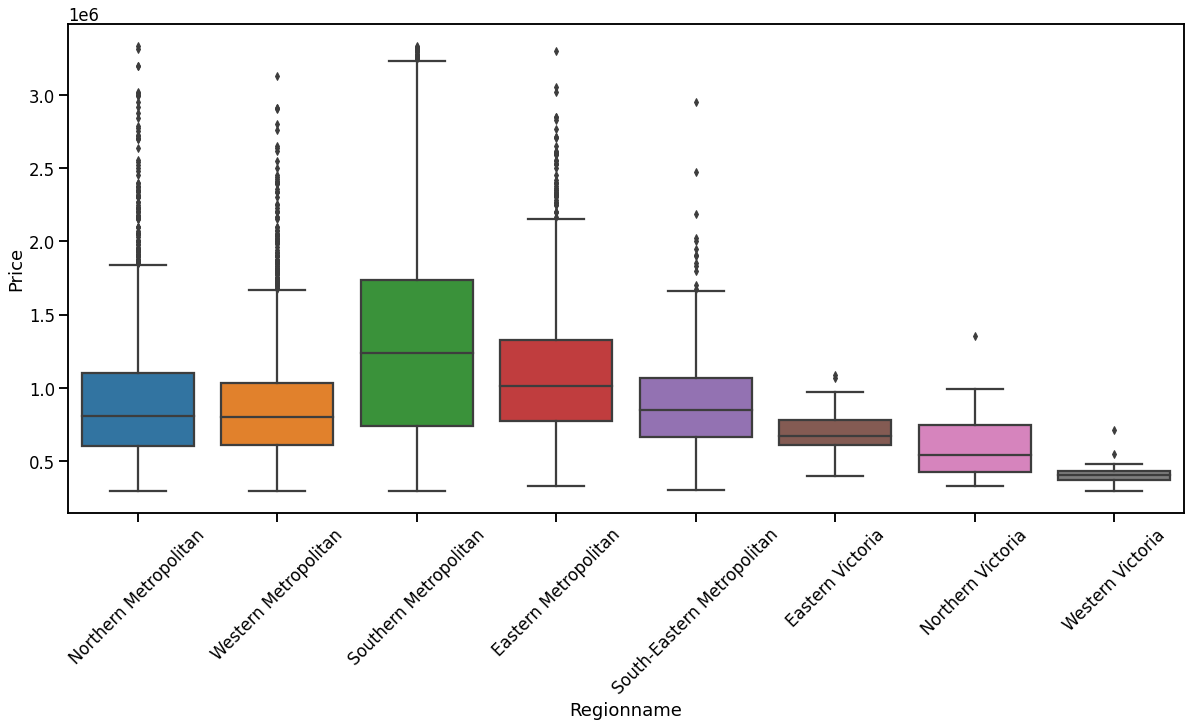

In [53]:
plt.figure(figsize=(20,9))
seaborn.boxplot(y=melb_df_ok.Price,x=melb_df_ok.Regionname) #,ci=None,hue=melb_df_ok.Rooms)
plt.xticks(rotation=45)

Vemos que sí! Hay una region de preferencia y es la Metropolitana Sur.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

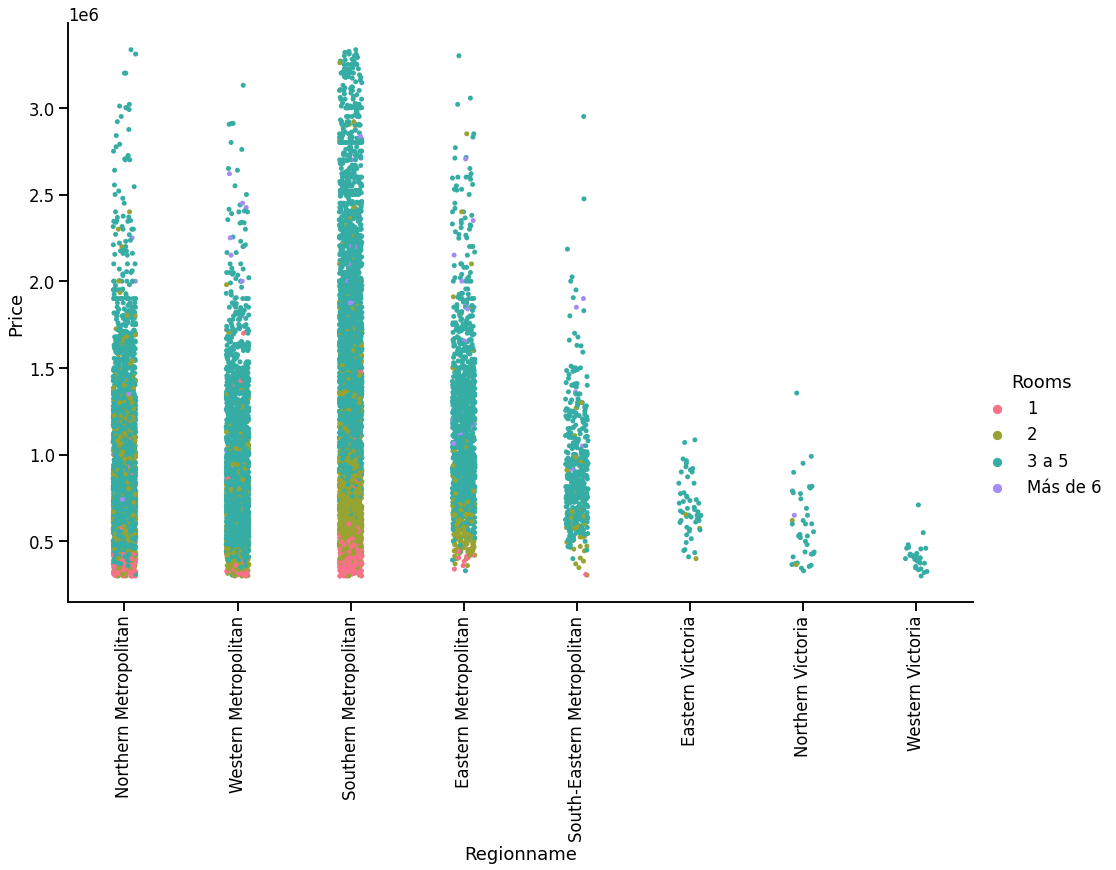

In [54]:
# Veamos si influye el numero de habitaciones (Rooms) en el precio de una propiedad dependiendo de la region en la que se encuentra:

# Reemplacemos el numero de rooms por las siguientes agrupaciones: 

new_groups = {1: '1', 2: '2',3: '3 a 5',4: '3 a 5',5: '3 a 5',6: 'Más de 6',7: 'Más de 6',8: 'Más de 6',10: 'Más de 6'}

hue_order = ['1', '2','3 a 5', 'Más de 6']   

melb_df_ok['Rooms'] = melb_df_ok['Rooms'].replace(new_groups)
seaborn.catplot(y='Price',x='Regionname',hue='Rooms', hue_order=hue_order, data=melb_df_ok,height=9, aspect=1.5,palette='husl')
plt.xticks(rotation=90)

In [55]:
melb_df_ok['Rooms'].unique()

array(['2', '3 a 5', '1', 'Más de 6'], dtype=object)

Vemos claramente que el precio crece con el numero de habitaciones, lo esperable. Pero vemos tmb que el precio se encarece para viviendas con igual numero de habitaciones, si la vivienda esta en ciertas regiones como el sur o el este metropolitano. 

Por ende, es relevante la columna "Regionname" para nuestro analisis. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

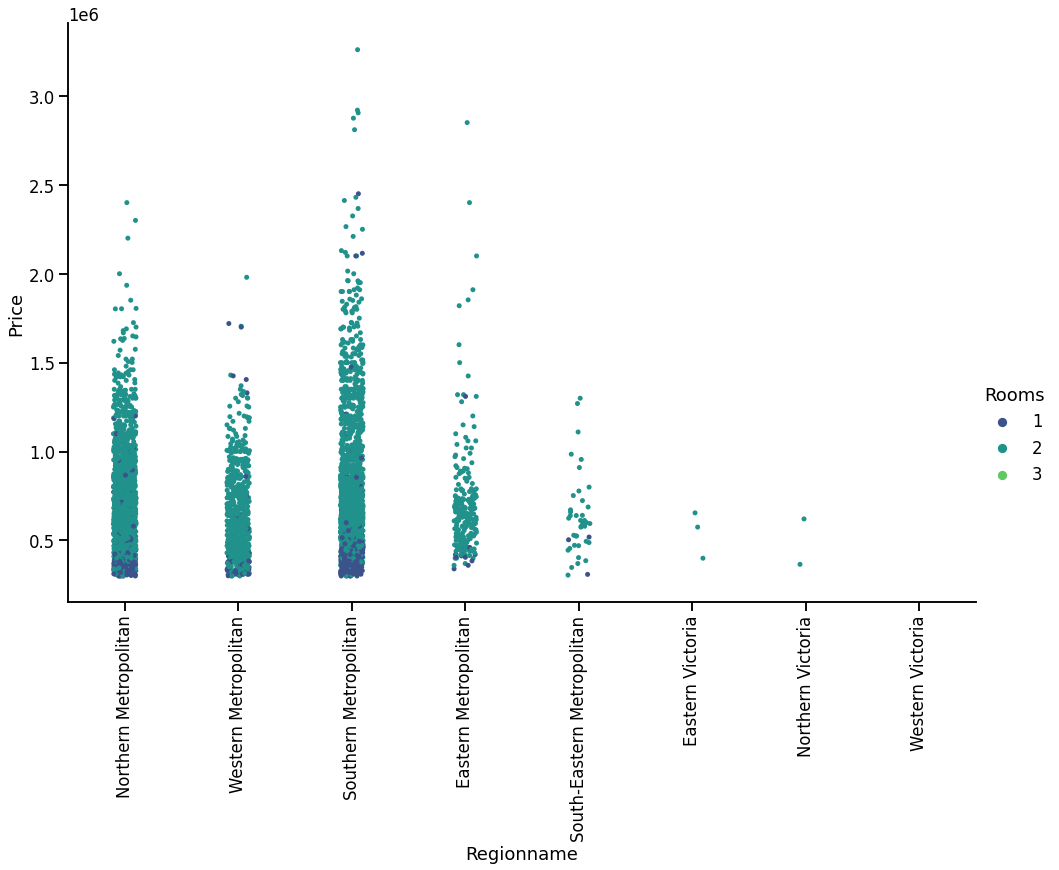

In [56]:
hue_order = ['1', '2','3']   

melb_df_ok['Rooms'] = melb_df_ok['Rooms'].replace(new_groups)
seaborn.catplot(y='Price',x='Regionname',hue='Rooms', hue_order=hue_order, data=melb_df_ok,height=9, aspect=1.5,palette='viridis')
plt.xticks(rotation=90)

##### Variable Landsize y Price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0.0, 2000.0)

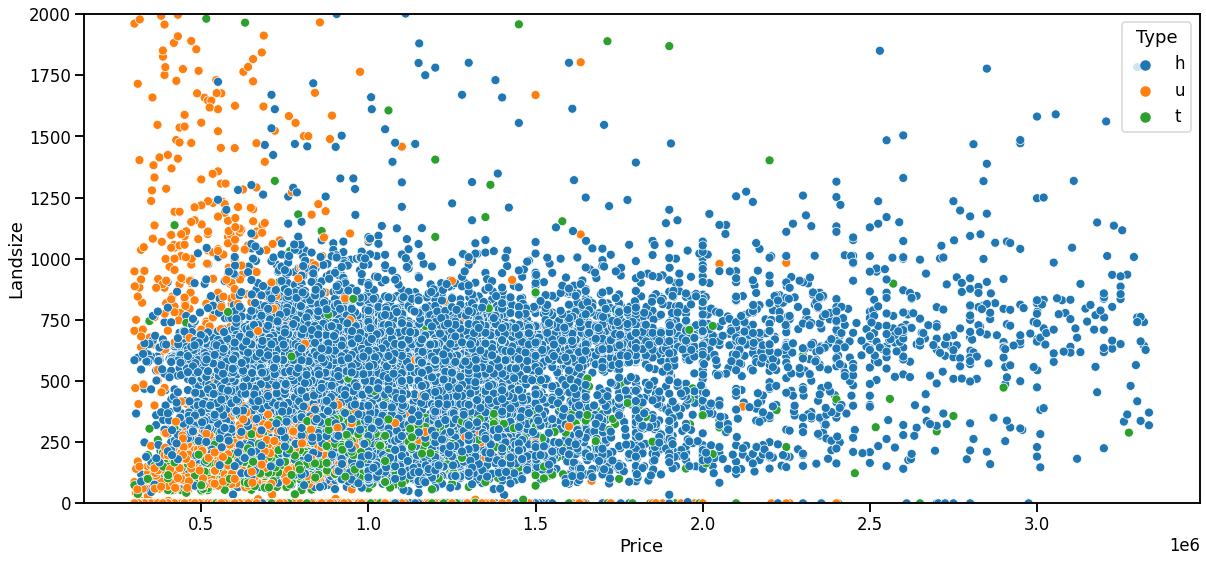

In [57]:
#Depende el precio del Tamaño del terreno? 

plt.figure(figsize=(20,9))
seaborn.scatterplot(melb_df_ok.Price,melb_df_ok.Landsize,hue=melb_df_ok.Type)
plt.ylim(0,2000)
## h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse
#esa linea en 0 indica los departamentos y no parece ser muy util esta magnitud. 

Acá observamos que gran parte de las viviendas registran valores de dimension de terreno nulos, por lo que esta variable, no parece de mucha utilidad. Ya habiamos visto que muchas propiedades tenian este valor nulo. Asumimos que podia deberse a que dichas propiedades fuesen units o townhouses y efectivamente vemos que las propiedades con Landsize nulo son en su mayoria "units". 
Mas allá de eso, no se observa una clara tendencia de aumento del precio con el valor de terreno, que es lo que hubieramos esperado tal vez. Por ende, descartamos por el momento esta variable. 

##### Variable Type y Price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



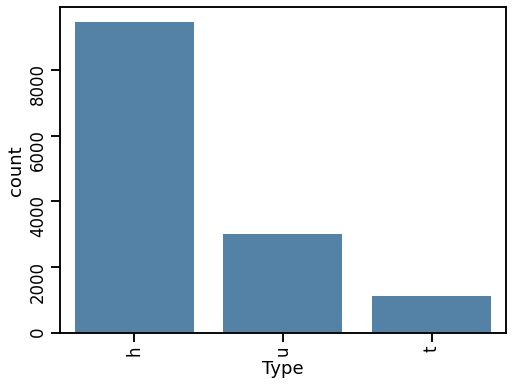

In [58]:
# Se observa dependencia entre ambas variables?

#Vemos a continuacion que tenemos mas houses que de las otras propiedades. Por lo que podriamos tratar con cuidado esta variable. 

fig = plt.figure(figsize=(8,6))
chart = seaborn.countplot(melb_df.Type, color='steelblue')
chart.tick_params(labelrotation=90)

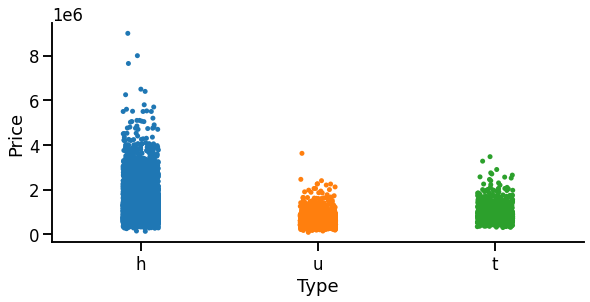

In [59]:
#Aqui observamos los precios segun el tipo, claramente, los valores de las casas son mayores. Lo cual es esperado.

seaborn.catplot(data=melb_df, y='Price',
                x='Type', height=4, aspect=2)


Se visualiza la relación entre Type y Price ya que por ejemplo para Type: H se visualiza que el precio suele ser más elevado

##### Variable PropertyCount y Price

In [60]:
#Veamos si hay correlacion entre la densidad de propiedades del suburbio y el precio. 
 
melb_df['Propertycount'].describe()

count    13580.000000
mean      7454.417378
std       4378.581772
min        249.000000
25%       4380.000000
50%       6555.000000
75%      10331.000000
max      21650.000000
Name: Propertycount, dtype: float64

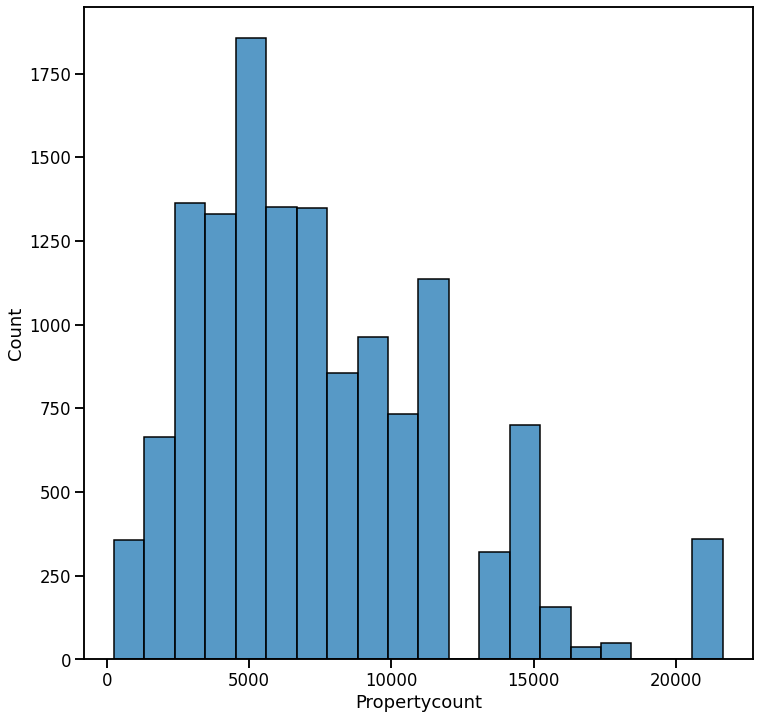

In [61]:
fig = plt.subplots(figsize=(12, 12))
data = melb_df['Propertycount']
seaborn.histplot(x=data, bins=20)

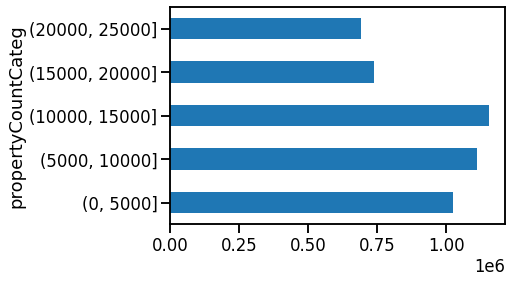

In [62]:
melb_df_properyCount=melb_df
melb_df_properyCount['propertyCountCateg']= pandas.cut(melb_df_properyCount['Propertycount'],[0,5000,10000,15000,20000,25000])
melb_df_properyCount[['propertyCountCateg','Propertycount']]

groupByProperty = melb_df_properyCount.groupby(['propertyCountCateg']).mean()['Price']
groupByProperty.plot(kind='barh')

Lo que vemos es que el precio de la propiedad variaria con Propertycount y parece maximizar su valor para suburbios con entre 5000 y 15000 propiedades pero no creemos que el grafico anterior sea suficiente para decir si son dependientes. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



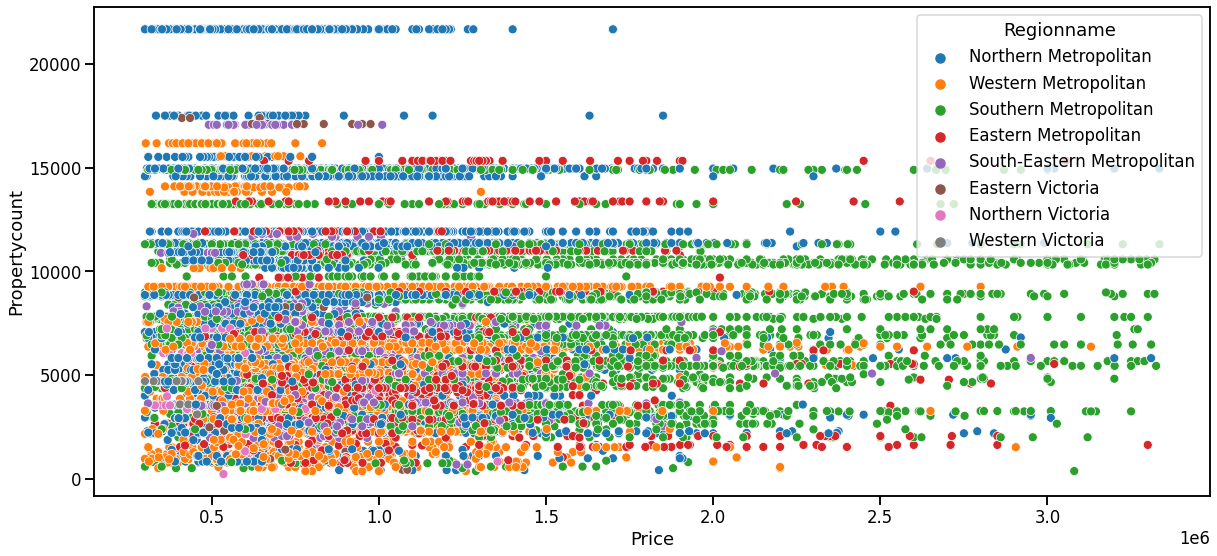

In [63]:
#Veamos que pasa si distinguimos las regiones (Regionname) en la grafica anterior. 
plt.figure(figsize=(20,9))
seaborn.scatterplot(melb_df_ok.Price,melb_df_ok.Propertycount,hue=melb_df_ok.Regionname)

In [64]:
## Vemos claramente que estos suburbios con entre 5000 y 15000 propiedades se encuentran principalmente en la region metropolitana sur que ya vimos que 
## era de las mas costosas de Melbourne. Por ende, sospechamos que los precios estan mas relacionados con Regionname y no con Propertycount. 

## Vamos a eliminar esta variable del analisis. 

##### Variable Suburb y Price

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 <a list of 43 Text major ticklabel objects>)

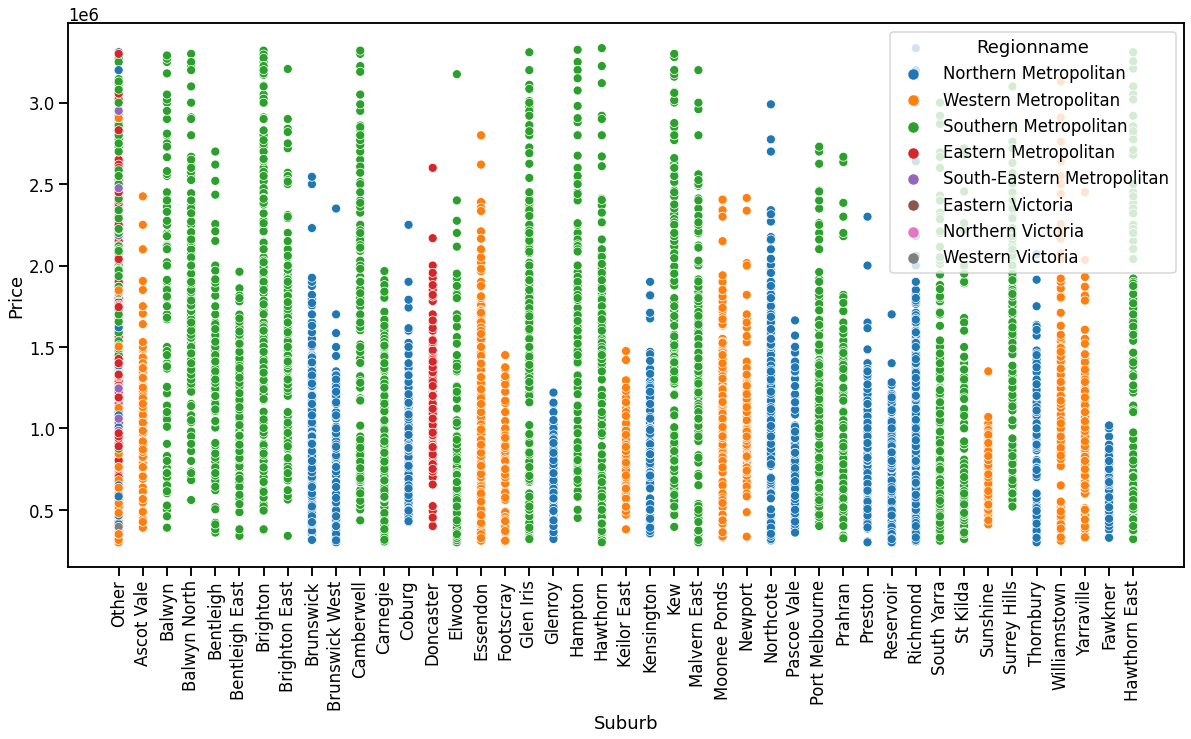

In [65]:
# Hay dependencia entre el precio y el suburbio en donde se encuentra la propiedad?

plt.figure(figsize=(20,10))
seaborn.scatterplot(y=melb_df_ok.Price,x=melb_df_ok.Suburb,hue=melb_df_ok.Regionname)
plt.xticks(rotation=90)

De la figura anterior vemos que el rango de precio de las propiedades varia segun el suburbio. Y vemos tmb, que los valores de las propiedades se extienden hasta valores mas elevados si la region es la metropolitana sur. 

##### Variable Rooms y Price

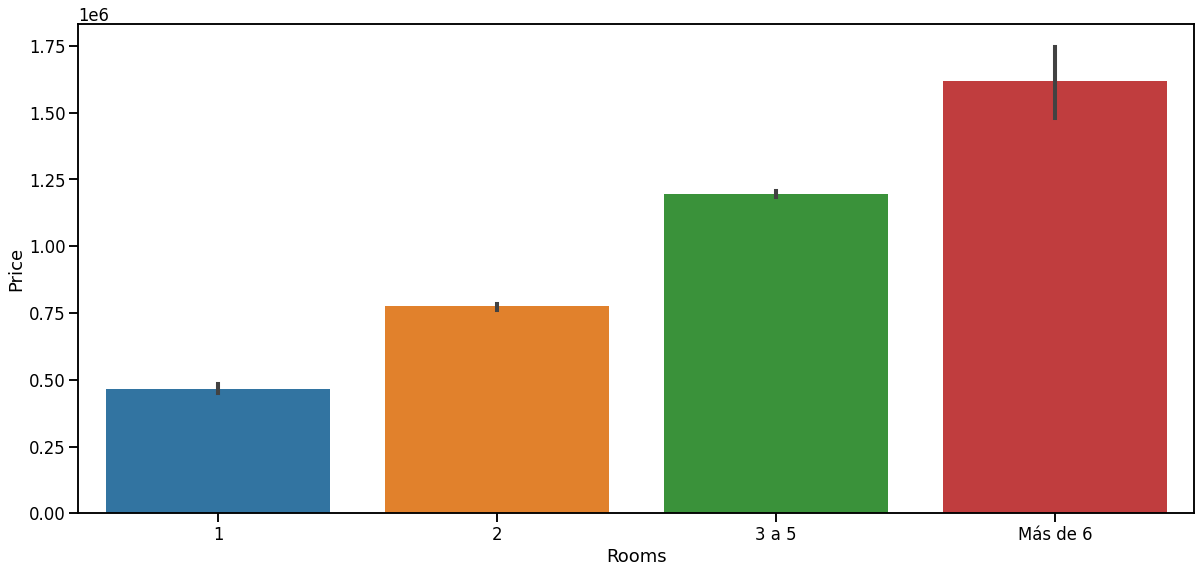

In [66]:
# Esperamos que haya correlacion entre dichas variables y eso es efectivamente lo que nos muestra el siguiente grafico. 
order=['1','2','3 a 5', 'Más de 6']
plt.figure(figsize=(20,9))
seaborn.barplot(y=melb_df_ok.Price,x=melb_df_ok.Rooms,order=order) #,hue=melb_df_ok.Regionname, ci=None)

##### Variable Bathrooms y Price

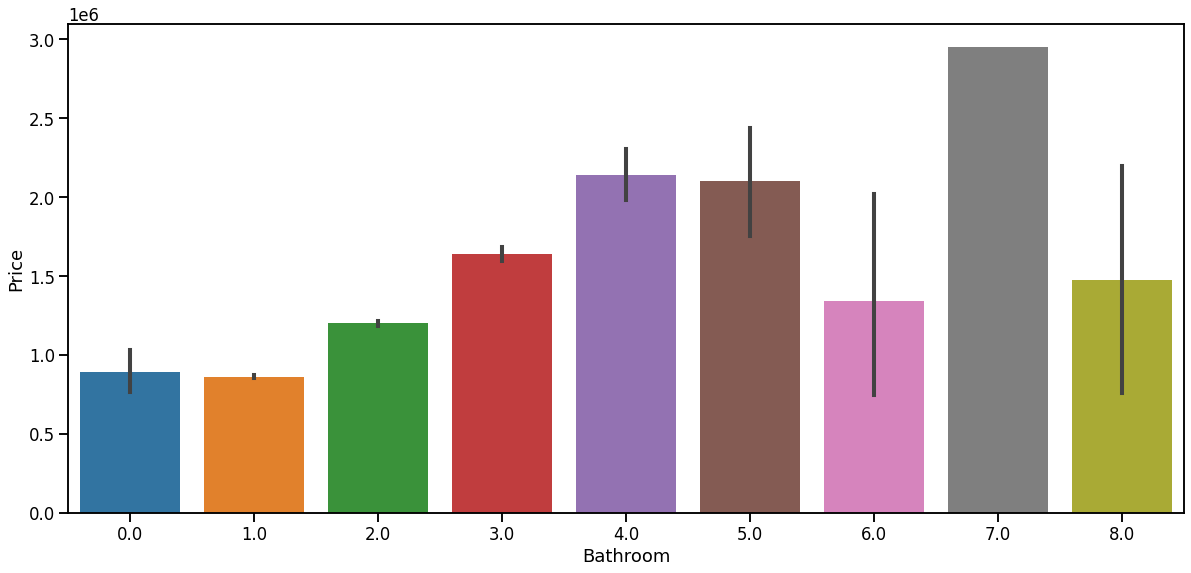

In [67]:
#Vemos tmb que el valor del precio crece con el # de baños. De igual manera, el # de baños es indicador del tamaño de la propiedad y el numero de
# habitaciones por lo que no hay una correlacion directa entre estas dos variables sino que la correlacion es consecuencia de la influencia de otras 
# variables en el precio. 
plt.figure(figsize=(20,9))
seaborn.barplot(y=melb_df_ok.Price,x=melb_df_ok.Bathroom) #,hue=melb_df_ok.Regionname, ci=None)

In [68]:
#Finalmente, nos quedamos con las siguientes columnas. 
columnas_seleccionadas = ['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car',
        'BuildingArea', 'YearBuilt', 'Lattitude', 'CouncilArea',
       'Longtitude', 'Regionname']
melb_df_ok = melb_df_ok[columnas_seleccionadas]
melb_df_ok

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,Lattitude,CouncilArea,Longtitude,Regionname
0,Other,2,h,1480000.0,2.5,3067.0,1.0,1.0,NaN,NaN,-37.79960,Yarra,144.99840,Northern Metropolitan
1,Other,2,h,1035000.0,2.5,3067.0,1.0,0.0,79.0,1900.0,-37.80790,Yarra,144.99340,Northern Metropolitan
2,Other,3 a 5,h,1465000.0,2.5,3067.0,2.0,0.0,150.0,1900.0,-37.80930,Yarra,144.99440,Northern Metropolitan
3,Other,3 a 5,h,850000.0,2.5,3067.0,2.0,1.0,NaN,NaN,-37.79690,Yarra,144.99690,Northern Metropolitan
4,Other,3 a 5,h,1600000.0,2.5,3067.0,1.0,2.0,142.0,2014.0,-37.80720,Yarra,144.99410,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Other,3 a 5,h,1245000.0,16.7,3150.0,2.0,2.0,NaN,1981.0,-37.90562,NaN,145.16761,South-Eastern Metropolitan
13576,Williamstown,3 a 5,h,1031000.0,6.8,3016.0,2.0,2.0,133.0,1995.0,-37.85927,NaN,144.87904,Western Metropolitan
13577,Williamstown,3 a 5,h,1170000.0,6.8,3016.0,2.0,4.0,NaN,1997.0,-37.85274,NaN,144.88738,Western Metropolitan
13578,Williamstown,3 a 5,h,2500000.0,6.8,3016.0,1.0,5.0,157.0,1920.0,-37.85908,NaN,144.89299,Western Metropolitan


### Agrupación de variables categóricas

Se agruparon las siguientes variables categóricas:


1.   Suburb (Ocurrencias menor a 100 en other)
2.   Type (Ocurrencias menor a 20 en other, como en este caso la ocurrencia mínima era 1.000 no se realizo ningún tipo de agrupación)
3. El numero de habitaciones quedo agrupado como 1, 2, de 3 a 5, más de 6 en una variable categorica. 



In [69]:
melb_df_ok.Rooms.unique()

array(['2', '3 a 5', '1', 'Más de 6'], dtype=object)

### Analisis de las variables latitud y longitud. Investigación de 2 variables

Se podrian utilizar la **latitud** y la **longitud** para buscar los lugares mas cercanos en lugar del zipcode, usando un algoritmo que calcule la distancia, definiendo un radio minimo. De esa forma podriamos tener definida mas precisamente la ubicacion de las propiedades y datos mas precisos de las ciudades, vecindarios y suburbios.
Otra opcion seria utilizar el **suburbio** y el **zipcode**, la precision podria aumentar en algunos, pero perderiamos datos de lugares cercanos.

### Agregado de datos de AIRBNB

#### Selección de columnas de AIRBNB

In [70]:
#Seleccionamos algunas columnas que podrian seros utiles. 
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'neighborhood', 'neighborhood_overview', 'city', 'zipcode',
  'price', 'weekly_price', 'monthly_price', 'smart_location', 'review_scores_location',
  'beds']

#Consideramos que los precios de alquiler, ya sean diarios, semanal o mensual podrian ayudar a rankear los lugares mas populares. El review_score nos
# puede ayudar a identificar las zonas mas buscadas.  
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



##### Visualización de datos de airbnb

In [71]:
airbnb_df[:3]

,neighborhood_overview,neighborhood,city,zipcode,smart_location,beds,price,weekly_price,monthly_price,review_scores_location
0,Very safe! Family oriented. Older age group.,Balwyn North,Manningham,3105,"Bulleen, Australia",2.0,60,NaN,NaN,9.0
1,This hip area is a crossroads between two grea...,Brunswick,Moreland,3057,"Brunswick East, Australia",1.0,35,200.0,803.0,9.0
2,A stay at our apartment means you can enjoy so...,St Kilda,Port Phillip,3182,"St Kilda, Australia",2.0,159,1253.0,4452.0,9.0


##### Describe de AIRBNB

In [72]:
airbnb_df.describe()

,beds,price,weekly_price,monthly_price,review_scores_location
count,22861.000000,22895.000000,2524.000000,1891.000000,17162.000000
mean,1.990027,148.004368,906.976228,3234.346906,9.714078
std,1.539957,210.883253,821.223782,2808.092144,0.697961
min,0.000000,0.000000,91.000000,400.000000,2.000000
25%,1.000000,71.000000,450.000000,1700.000000,10.000000
50%,1.000000,111.000000,750.000000,2800.000000,10.000000
75%,2.000000,165.000000,1066.000000,3912.500000,10.000000
max,24.000000,12624.000000,11536.000000,54258.000000,10.000000


##### Info de AIRBNB

In [73]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighborhood_overview   14424 non-null  object 
 1   neighborhood            17082 non-null  object 
 2   city                    22895 non-null  object 
 3   zipcode                 22753 non-null  object 
 4   smart_location          22895 non-null  object 
 5   beds                    22861 non-null  float64
 6   price                   22895 non-null  int64  
 7   weekly_price            2524 non-null   float64
 8   monthly_price           1891 non-null   float64
 9   review_scores_location  17162 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ MB


##### Eliminación de outliers de AIRBNB

Eliminar los precios que estan en los limites se ven valores como 0 y 12624, lo cual parecen valores poco posible. El objetivo es agregar al dataset el precio promedio de alquiler de una vivienda en el sector en donde esta la propiedad

In [74]:
airbnb_df.price.quantile(.95), airbnb_df.price.quantile(.98), airbnb_df.price.quantile(.99), airbnb_df.price.max()

(352.0, 595.0, 800.0, 12624)

In [75]:
airbnb_df.price.quantile(.05), airbnb_df.price.quantile(.04), airbnb_df.price.quantile(.01), airbnb_df.price.min()

(37.0, 35.0, 25.0, 0)

In [76]:
airbnb_df_ok = airbnb_df[(airbnb_df.price >= airbnb_df.price.quantile(.01)) & (airbnb_df.price <= airbnb_df.price.quantile(.99))]
airbnb_df_ok.describe()

,beds,price,weekly_price,monthly_price,review_scores_location
count,22506.000000,22540.000000,2497.000000,1871.000000,17007.000000
mean,1.968364,136.777862,873.609131,3126.982362,9.716646
std,1.492386,103.531085,659.596997,2364.665478,0.689870
min,0.000000,25.000000,100.000000,400.000000,2.000000
25%,1.000000,71.000000,450.000000,1700.000000,10.000000
50%,1.000000,109.000000,744.000000,2800.000000,10.000000
75%,2.000000,163.000000,1050.000000,3900.000000,10.000000
max,20.000000,800.000000,9899.000000,54258.000000,10.000000


#### Merge de columnas entre AIRBNB y dataframe original

##### Estandarizar zipcode

In [77]:
# Estandarizar zipcodes por diferencias en formato de datos
airbnb_df_ok['zipcode'] = pandas.to_numeric(airbnb_df_ok.zipcode, errors='coerce')
# Eliminar zipcodes nulos
airbnb_df_ok = airbnb_df_ok[~airbnb_df_ok['zipcode'].isna()]
airbnb_df_ok[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,neighborhood_overview,neighborhood,city,zipcode,smart_location,beds,price,weekly_price,monthly_price,review_scores_location
0,Very safe! Family oriented. Older age group.,Balwyn North,Manningham,3105.0,"Bulleen, Australia",2.0,60,NaN,NaN,9.0
1,This hip area is a crossroads between two grea...,Brunswick,Moreland,3057.0,"Brunswick East, Australia",1.0,35,200.0,803.0,9.0
2,A stay at our apartment means you can enjoy so...,St Kilda,Port Phillip,3182.0,"St Kilda, Australia",2.0,159,1253.0,4452.0,9.0
3,"This is a great neighbourhood – it is quiet, y...",Thornbury,Darebin,3071.0,"Thornbury, Australia",1.0,50,250.0,920.0,9.0
4,NaN,St Kilda East,Port Phillip,3183.0,"St Kilda East, Australia",2.0,69,400.0,1900.0,10.0


##### Análisis de Suburbios en AIRBNB

In [78]:
ocurrencia_minima = 10
# Buscar Suburbios con menos de n apariciones
airbnb_zipcode = airbnb_df_ok.groupby('zipcode').size()
airbnb_zipcode = airbnb_zipcode[airbnb_zipcode < ocurrencia_minima].sort_values()

# Eliminar las filas que tengan esos zipscodes
airbnb_zipcode_to_delete = airbnb_zipcode.index.tolist()
if len(airbnb_zipcode_to_delete) > 0:
    airbnb_df_ok = airbnb_df_ok[~airbnb_df_ok['zipcode'].isin(airbnb_zipcode_to_delete)]
airbnb_df_ok[:5]

,neighborhood_overview,neighborhood,city,zipcode,smart_location,beds,price,weekly_price,monthly_price,review_scores_location
0,Very safe! Family oriented. Older age group.,Balwyn North,Manningham,3105.0,"Bulleen, Australia",2.0,60,NaN,NaN,9.0
1,This hip area is a crossroads between two grea...,Brunswick,Moreland,3057.0,"Brunswick East, Australia",1.0,35,200.0,803.0,9.0
2,A stay at our apartment means you can enjoy so...,St Kilda,Port Phillip,3182.0,"St Kilda, Australia",2.0,159,1253.0,4452.0,9.0
3,"This is a great neighbourhood – it is quiet, y...",Thornbury,Darebin,3071.0,"Thornbury, Australia",1.0,50,250.0,920.0,9.0
4,NaN,St Kilda East,Port Phillip,3183.0,"St Kilda East, Australia",2.0,69,400.0,1900.0,10.0


##### Unificación de city, neiborhood, suburb en AIRBNB

In [79]:
#Consideraciones a futuro: 

# Ver que hacemos con los datos de city, neiborhood
# Hay 20 ciudades que tienen mas de un valor para un zipcode
# Hay 115 neighborhoods que tienen mas de un valor para un zipcode
# podriamos crear campos con todas las ciudades por zipcode, todos los suburbios por zipcode y todos los neighborhoods por zipcode
# o sacar toda esa info, y solo sumar el valor promedio de alquiler en la zona de la propiedad
airbnb_zipcode = airbnb_df_ok.groupby(['zipcode']).agg(avg_price=pandas.NamedAgg(column="price", aggfunc="mean"),
                                                       mean_review_scores_location=pandas.NamedAgg(column="review_scores_location", aggfunc="mean"),
                                                       min_city=pandas.NamedAgg(column="city", aggfunc="first"),
                                                       max_city=pandas.NamedAgg(column="city", aggfunc="last"),
                                                       min_neighborhood=pandas.NamedAgg(column="neighborhood", aggfunc="first"),
                                                       max_neighborhood=pandas.NamedAgg(column="neighborhood", aggfunc="last"))
airbnb_zipcode[airbnb_zipcode.min_neighborhood != airbnb_zipcode.max_neighborhood]

,avg_price,mean_review_scores_location,min_city,max_city,min_neighborhood,max_neighborhood
zipcode,,,,,,
3003.0,131.033962,9.657005,Melbourne,Melbourne,West Melbourne,Central Business District
3004.0,151.938889,9.788043,Melbourne,Melbourne,South Yarra,Central Business District
3015.0,132.046154,9.625000,Hobsons Bay,Hobsons Bay,Spotswood/South Kingsville,Newport
3020.0,71.720930,8.937500,Brimbank,Brimbank,None,None
3021.0,81.650000,9.153846,Brimbank,Brimbank,None,None
...,...,...,...,...,...,...
3805.0,198.696970,9.480000,Casey,Casey,None,None
3806.0,88.129032,9.680000,Casey,Casey,None,None
3809.0,76.214286,9.666667,Cardinia,Cardinia,None,None


In [80]:
# Este es un ejemplo de como sacar todos los neighborhood para un zipcode
def get_list(str_column: str, int_zipcode) -> str:
    values_list = airbnb_df_ok[airbnb_df_ok.zipcode == int_zipcode][str_column].unique().tolist()
    values_list = [x for x in values_list if pandas.isnull(x) == False]
    values_list.sort()
    return ', '.join(values_list)


In [81]:
# Este es un ejemplo de como crear un dataframe con el resultado
zipcode_df = pandas.DataFrame(columns=['zipcode', 'cities', 'neighborhoods'])
zipcode_df['zipcode'] = airbnb_zipcode.index

# Lista de suburs, cities y neighborhoods
aSuburbs = []
aCities = []
aNeighborhoods = []
for index, row in zipcode_df.iterrows():
    aCities.append(get_list('city', row['zipcode']))
    aNeighborhoods.append(get_list('neighborhood', row['zipcode']))

zipcode_df['cities'] = aCities
zipcode_df['neighborhoods'] = aNeighborhoods
zipcode_df['daily_rental_price'] = airbnb_zipcode.avg_price.tolist()
zipcode_df['review_scores_location'] = airbnb_zipcode.mean_review_scores_location.tolist()

zipcode_df

,zipcode,cities,neighborhoods,daily_rental_price,review_scores_location
0,3000.0,"Boroondara, Casey, Melbourne, Moreland, Port P...","Abbotsford, Balwyn, Carlton, Central Business ...",144.072689,9.912822
1,3002.0,"Melbourne, Yarra","East Melbourne, Fitzroy, West Melbourne",168.127660,9.901408
2,3003.0,Melbourne,"Central Business District, North Melbourne, So...",131.033962,9.657005
3,3004.0,"Glen Eira, Maribyrnong, Melbourne, Moonee Vall...","Abbotsford, Albert Park, Armadale, Carlton, Ca...",151.938889,9.788043
4,3006.0,"Melbourne, Port Phillip, Yarra","Central Business District, Collingwood, Dockla...",174.352800,9.833158
...,...,...,...,...,...
174,3805.0,Casey,,198.696970,9.480000
175,3806.0,Casey,,88.129032,9.680000
176,3809.0,Cardinia,,76.214286,9.666667
177,3810.0,Cardinia,,94.954545,9.882353


In [82]:
melb_df_mixed = melb_df_ok.merge(zipcode_df, how='left', left_on='Postcode', right_on='zipcode')
del(melb_df_mixed['zipcode'])
melb_df_mixed[:5]

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,Lattitude,CouncilArea,Longtitude,Regionname,cities,neighborhoods,daily_rental_price,review_scores_location
0,Other,2,h,1480000.0,2.5,3067.0,1.0,1.0,NaN,NaN,-37.7996,Yarra,144.9984,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652
1,Other,2,h,1035000.0,2.5,3067.0,1.0,0.0,79.0,1900.0,-37.8079,Yarra,144.9934,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652
2,Other,3 a 5,h,1465000.0,2.5,3067.0,2.0,0.0,150.0,1900.0,-37.8093,Yarra,144.9944,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652
3,Other,3 a 5,h,850000.0,2.5,3067.0,2.0,1.0,NaN,NaN,-37.7969,Yarra,144.9969,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652
4,Other,3 a 5,h,1600000.0,2.5,3067.0,1.0,2.0,142.0,2014.0,-37.8072,Yarra,144.9941,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652


## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



In [83]:
# Armamos una lista de Suburb y CouncilArea, usamos la moda para CouncilArea porque hay mas de una por suburbio
council_data = melb_df[['Suburb', 'CouncilArea']].dropna().groupby(['Suburb']).agg(CouncilArea_mode=pandas.NamedAgg(column="CouncilArea", aggfunc=pandas.Series.mode)).dropna()
council_data

# Creamos un dataframe con el resultado
council_df = pandas.DataFrame(columns=['Suburb', 'CouncilArea_mode'])

council_df['Suburb'] = council_data.index
council_df['CouncilArea_mode'] = council_data.CouncilArea_mode.tolist()
council_df

,Suburb,CouncilArea_mode
0,Abbotsford,Yarra
1,Aberfeldie,Moonee Valley
2,Airport West,Moonee Valley
3,Albanvale,Brimbank
4,Albert Park,Port Phillip
...,...,...
303,Wonga Park,Manningham
304,Wyndham Vale,Wyndham
305,Yallambie,Banyule
306,Yarra Glen,Yarra Ranges


In [84]:
# Agregamos la columna CouncilArea_mode
melb_df_imputed = melb_df_mixed.merge(council_df, how='left', left_on='Suburb', right_on='Suburb')
melb_df_imputed[:5]

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,Lattitude,CouncilArea,Longtitude,Regionname,cities,neighborhoods,daily_rental_price,review_scores_location,CouncilArea_mode
0,Other,2,h,1480000.0,2.5,3067.0,1.0,1.0,NaN,NaN,-37.7996,Yarra,144.9984,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652,NaN
1,Other,2,h,1035000.0,2.5,3067.0,1.0,0.0,79.0,1900.0,-37.8079,Yarra,144.9934,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652,NaN
2,Other,3 a 5,h,1465000.0,2.5,3067.0,2.0,0.0,150.0,1900.0,-37.8093,Yarra,144.9944,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652,NaN
3,Other,3 a 5,h,850000.0,2.5,3067.0,2.0,1.0,NaN,NaN,-37.7969,Yarra,144.9969,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652,NaN
4,Other,3 a 5,h,1600000.0,2.5,3067.0,1.0,2.0,142.0,2014.0,-37.8072,Yarra,144.9941,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652,NaN


In [85]:
# Agregamos los CouncilArea que faltan y estan en la moda
melb_df_imputed['CouncilArea'] = numpy.where(melb_df_imputed['CouncilArea'].isna(), melb_df_imputed['CouncilArea_mode'], melb_df_imputed['CouncilArea'])
del(melb_df_imputed['CouncilArea_mode'])
melb_df_imputed[melb_df_imputed['CouncilArea'].isna()]

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,Lattitude,CouncilArea,Longtitude,Regionname,cities,neighborhoods,daily_rental_price,review_scores_location
11959,Other,3 a 5,h,1436000.0,7.5,3040.0,3.0,3.0,187.0,1922.0,-37.75788,NaN,144.90487,Western Metropolitan,Moonee Valley,Brunswick,115.872727,9.292683
11960,Other,3 a 5,h,905000.0,10.5,3020.0,2.0,3.0,NaN,1925.0,-37.78345,NaN,144.82295,Western Metropolitan,Brimbank,,71.720930,8.937500
11961,Other,3 a 5,h,1680000.0,5.7,3078.0,3.0,2.0,NaN,NaN,-37.77928,NaN,145.02993,Northern Metropolitan,"Darebin, Yarra","Alphington, Northcote",113.763889,9.372881
11962,Other,3 a 5,h,913000.0,11.0,3018.0,2.0,3.0,148.0,1985.0,-37.86140,NaN,144.81931,Western Metropolitan,Hobsons Bay,Williamstown,87.333333,9.500000
11963,Other,3 a 5,h,590000.0,15.5,3028.0,1.0,2.0,NaN,NaN,-37.87063,NaN,144.77632,Western Metropolitan,Hobsons Bay,,85.138889,9.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13301,Other,3 a 5,h,1330000.0,14.7,3152.0,2.0,2.0,191.0,1980.0,-37.86887,NaN,145.22116,Eastern Metropolitan,Knox,,92.312500,9.184211
13302,Other,2,h,650000.0,14.5,3087.0,1.0,1.0,79.0,2006.0,-37.70657,NaN,145.07878,Northern Metropolitan,NaN,NaN,NaN,NaN
13303,Other,3 a 5,h,635000.0,14.7,3030.0,2.0,1.0,172.0,1980.0,-37.89327,NaN,144.64789,Western Metropolitan,"Brimbank, Hobsons Bay, Wyndham",Newport,115.748062,9.297753
13304,Other,3 a 5,h,582000.0,16.5,3049.0,2.0,2.0,NaN,NaN,-37.67917,NaN,144.89390,Northern Metropolitan,Hume,,92.285714,9.550000


## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [86]:
melb_df_imputed.to_csv('MELB_ok.csv', sep=',')